# Making predictions

In [1]:
import pandas as pd
import numpy as np

taiwan_real_estate = pd.read_csv("data/taiwan_real_estate2.csv")

taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [2]:
from statsmodels.formula.api import ols

mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data= taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()

print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [3]:
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
print(explanatory_data)

    n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10


In [4]:
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
print(price_twd_msq)

0      8.224237
1      9.022317
2      9.820397
3     10.618477
4     11.416556
5     12.214636
6     13.012716
7     13.810795
8     14.608875
9     15.406955
10    16.205035
dtype: float64


In [5]:
prediction_data = explanatory_data.assign(price_twd_msq= price_twd_msq)
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


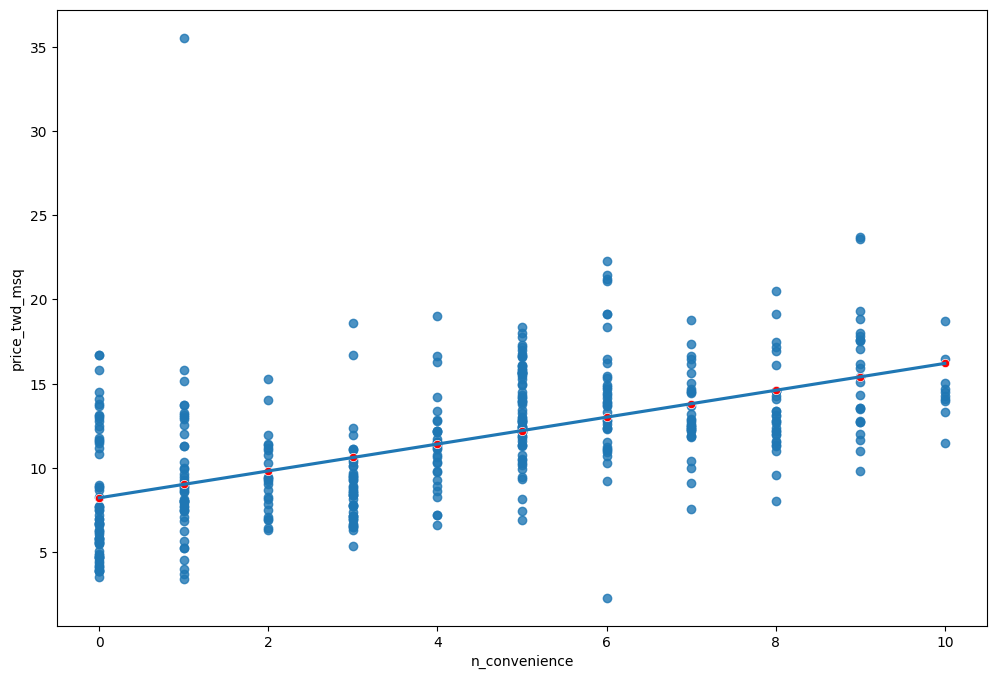

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(12,8))
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data,
                color="red")
plt.show()

In [7]:
# Define a DataFrame impossible
impossible = pd.DataFrame({'n_convenience':[-1,2.5]})

imp_price_twd_msq = mdl_price_vs_conv.predict(impossible)
print(imp_price_twd_msq)

0     7.426158
1    10.219437
dtype: float64


# Working with model objects

equivalente a predicts

In [8]:
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


Diferencia entre predicciones y objetos de modelo

In [9]:
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [10]:
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           3.41e-37
Time:                        11:09:59   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [11]:
coeffs = mdl_price_vs_conv.params

intercept = coeffs[0]
slope = coeffs[1]

price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035


C:\Users\CIRO\AppData\Local\Temp\ipykernel_11096\1767281432.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coeffs[0]
C:\Users\CIRO\AppData\Local\Temp\ipykernel_11096\1767281432.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = coeffs[1]


In [12]:
print(price_twd_msq.assign(predictions_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience  predictions_auto
0        8.224237          8.224237
1        9.022317          9.022317
2        9.820397          9.820397
3       10.618477         10.618477
4       11.416556         11.416556
5       12.214636         12.214636
6       13.012716         13.012716
7       13.810795         13.810795
8       14.608875         14.608875
9       15.406955         15.406955
10      16.205035         16.205035


# Regression the mean

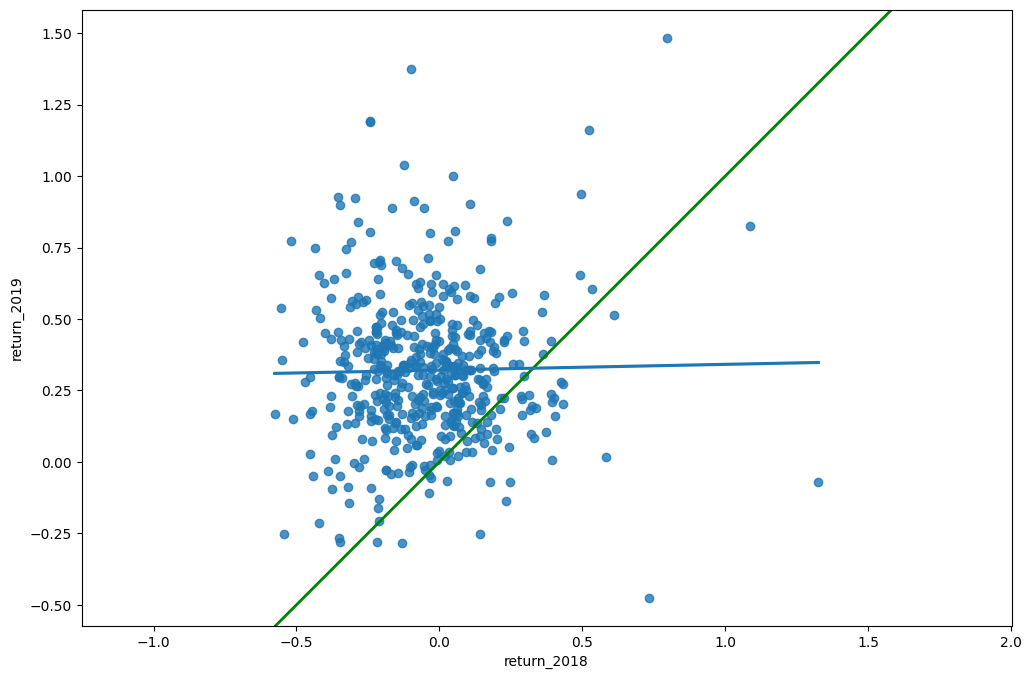

In [13]:
sp500_yearly_returns = pd.read_csv('data/sp500_yearly_returns.csv')

fig = plt.figure(figsize=(12,8))

plt.axline(xy1=(0,0), slope=1,linewidth=2, color='green')

sns.regplot(data=sp500_yearly_returns, x='return_2018', y='return_2019', ci=None)

plt.axis('equal')

plt.show()

In [14]:
mdl_returns = ols('return_2019 ~ return_2018', data=sp500_yearly_returns).fit()
mdl_returns.params

Intercept      0.321321
return_2018    0.020069
dtype: float64

In [15]:
explanatory_data = pd.DataFrame({'return_2018':[-1,0,1]})

predict= mdl_returns.predict(explanatory_data)

predict

0    0.301251
1    0.321321
2    0.341390
dtype: float64

# Transforming variables

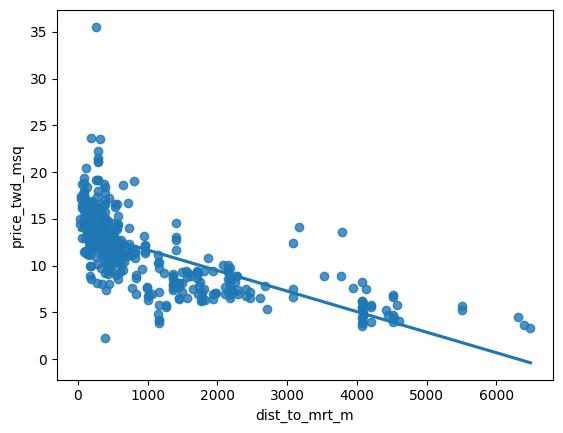

In [16]:
sns.regplot(data=taiwan_real_estate, x='dist_to_mrt_m',y='price_twd_msq',ci=None)

plt.show()

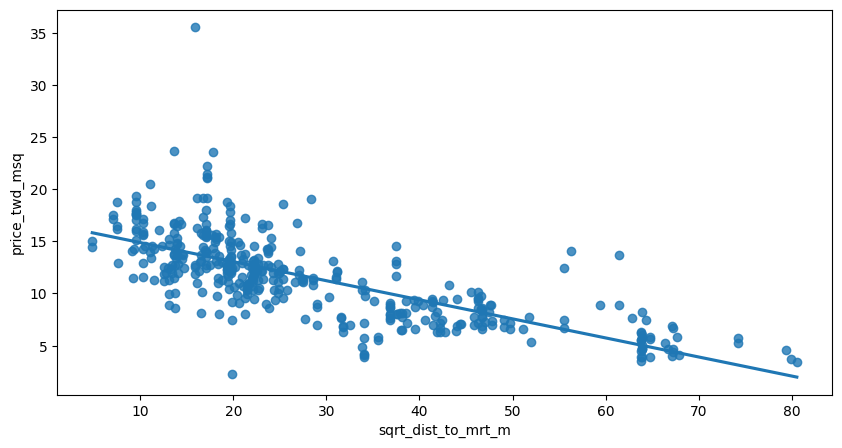

In [17]:
taiwan_real_estate['sqrt_dist_to_mrt_m'] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

plt.figure(figsize=(10,5))

sns.regplot(data=taiwan_real_estate, x='sqrt_dist_to_mrt_m',y='price_twd_msq',ci=None)
plt.show()

In [20]:
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m ',data=taiwan_real_estate).fit()

print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [23]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),"dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

prediction_data = explanatory_data.assign(price_twd_msq=mdl_price_vs_dist.predict(explanatory_data))

print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


<Axes: xlabel='sqrt_dist_to_mrt_m', ylabel='price_twd_msq'>

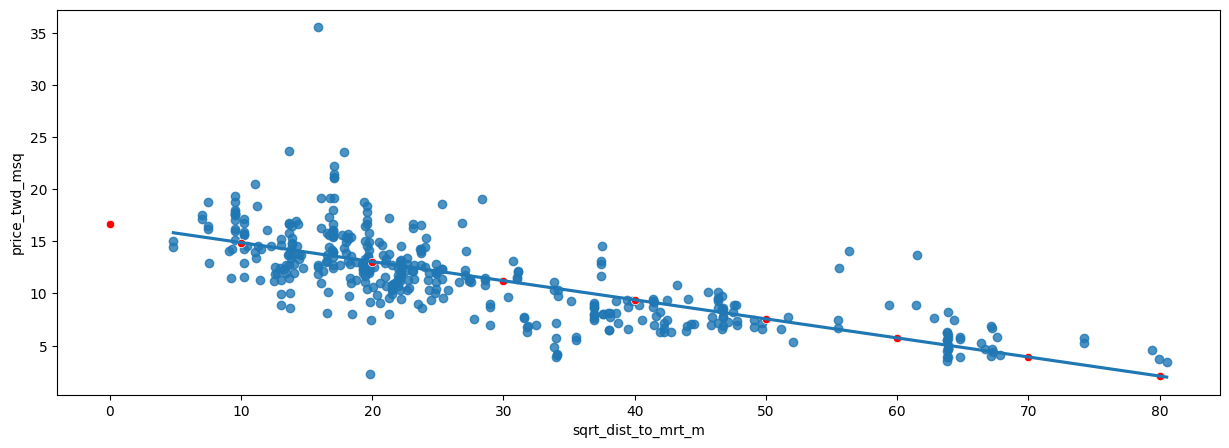

In [27]:
fig = plt.figure(figsize=(15,5))
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
sns.scatterplot(data=prediction_data, x='sqrt_dist_to_mrt_m',y='price_twd_msq',color='red')

<Axes: xlabel='qdrt_n_impressions', ylabel='qdrt_n_clicks'>

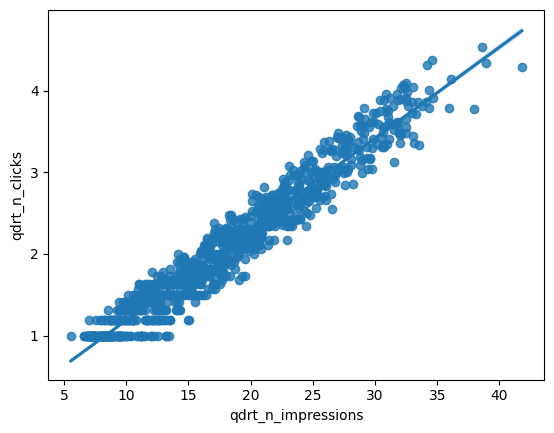

In [31]:
ad_conversion = pd.read_csv('data/ad_conversion.csv')

ad_conversion['qdrt_n_impressions'] =ad_conversion['n_impressions'] ** 0.25
ad_conversion['qdrt_n_clicks'] =ad_conversion['n_clicks'] ** 0.25

fig = plt.figure()

sns.regplot(data=ad_conversion,x='qdrt_n_impressions',y='qdrt_n_clicks')

In [38]:
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()


explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25, "n_impressions": np.arange(0, 3e6+1, 5e5)})


prediction_data = explanatory_data.assign(qdrt_n_clicks =mdl_click_vs_impression.predict(explanatory_data))
prediction_data["n_clicks"] = prediction_data['qdrt_n_clicks'] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


c:\Users\CIRO\AppData\Local\Programs\Python\Python314\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


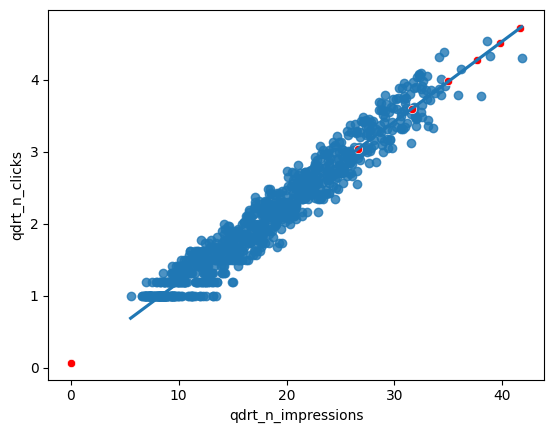

In [40]:
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

sns.scatterplot(data=prediction_data, x='qdrt_n_impressions',y='qdrt_n_clicks', color='red')
plt.show()